## Get SDSS DR7 QSO Summary data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 

In [4]:
import os
path = os.getcwd()
# Get the quasar catalog - it gets saved in the same directory as the notebook 
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/DB_QSO_S82.dat.gz"
os.system(f'wget {url}')   

In [10]:
from astropy.table import Table
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
# we know the column meaning from 
# https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

## Get SDSS DR7 QSO Light Curve data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 


In [12]:
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/QSO_S82.tar.gz"
os.system(f'wget {url}')  

--2022-08-31 15:29:26--  https://faculty.washington.edu/ivezic/macleod/qso_dr7/QSO_S82.tar.gz
Resolving faculty.washington.edu... 128.208.60.35, 140.142.214.168
Connecting to faculty.washington.edu|128.208.60.35|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 25280476 (24M) [application/x-gzip]
Saving to: 'QSO_S82.tar.gz'

     0K .......... .......... .......... .......... ..........  0% 3.77M 6s
    50K .......... .......... .......... .......... ..........  0% 8.02M 5s
   100K .......... .......... .......... .......... ..........  0% 2.35M 7s
   150K .......... .......... .......... .......... ..........  0% 67.2M 5s
   200K .......... .......... .......... .......... ..........  1% 89.1M 4s
   250K .......... .......... .......... .......... ..........  1% 3.66M 4s
   300K .......... .......... .......... .......... ..........  1% 31.2M 4s
   350K .......... .......... .......... .......... ..........  1% 54.0M 3s
   400K .......... .......... .......... ..

 11650K .......... .......... .......... .......... .......... 47% 40.6M 0s
 11700K .......... .......... .......... .......... .......... 47% 78.9M 0s
 11750K .......... .......... .......... .......... .......... 47% 29.2M 0s
 11800K .......... .......... .......... .......... .......... 47% 92.3M 0s
 11850K .......... .......... .......... .......... .......... 48% 33.9M 0s
 11900K .......... .......... .......... .......... .......... 48% 51.9M 0s
 11950K .......... .......... .......... .......... .......... 48% 47.6M 0s
 12000K .......... .......... .......... .......... .......... 48% 24.0M 0s
 12050K .......... .......... .......... .......... .......... 49% 31.8M 0s
 12100K .......... .......... .......... .......... .......... 49% 69.3M 0s
 12150K .......... .......... .......... .......... .......... 49% 35.6M 0s
 12200K .......... .......... .......... .......... .......... 49% 84.6M 0s
 12250K .......... .......... .......... .......... .......... 49% 69.5M 0s
 12300K ....

 19800K .......... .......... .......... .......... .......... 80% 50.4M 0s
 19850K .......... .......... .......... .......... .......... 80% 38.8M 0s
 19900K .......... .......... .......... .......... .......... 80% 24.7M 0s
 19950K .......... .......... .......... .......... .......... 81% 59.6M 0s
 20000K .......... .......... .......... .......... .......... 81% 70.0M 0s
 20050K .......... .......... .......... .......... .......... 81% 71.7M 0s
 20100K .......... .......... .......... .......... .......... 81% 41.2M 0s
 20150K .......... .......... .......... .......... .......... 81% 66.7M 0s
 20200K .......... .......... .......... .......... .......... 82% 15.6M 0s
 20250K .......... .......... .......... .......... .......... 82% 35.8M 0s
 20300K .......... .......... .......... .......... .......... 82% 56.4M 0s
 20350K .......... .......... .......... .......... .......... 82% 77.8M 0s
 20400K .......... .......... .......... .......... .......... 82% 41.1M 0s
 20450K ....

0

Unpack the light curves...https://www.geeksforgeeks.org/tar-command-linux-examples/

In [14]:
! tar xvzf QSO_S82.tar.gz

x QSO_S82/
x QSO_S82/2103773
x QSO_S82/2103863
x QSO_S82/2104159
x QSO_S82/70
x QSO_S82/2104226
x QSO_S82/98
x QSO_S82/2104522
x QSO_S82/2104791
x QSO_S82/2104983
x QSO_S82/2105631
x QSO_S82/2105662
x QSO_S82/2105705
x QSO_S82/2105888
x QSO_S82/2105963
x QSO_S82/2106045
x QSO_S82/2106392
x QSO_S82/2107076
x QSO_S82/2107339
x QSO_S82/2107686
x QSO_S82/2108440
x QSO_S82/233
x QSO_S82/2108870
x QSO_S82/2109029
x QSO_S82/2109241
x QSO_S82/2109295
x QSO_S82/2110228
x QSO_S82/2110298
x QSO_S82/2111102
x QSO_S82/2111406
x QSO_S82/2111491
x QSO_S82/2111722
x QSO_S82/2111754
x QSO_S82/2112247
x QSO_S82/2112550
x QSO_S82/2112657
x QSO_S82/2112737
x QSO_S82/2112797
x QSO_S82/2112846
x QSO_S82/2113281
x QSO_S82/2114023
x QSO_S82/2114242
x QSO_S82/2114286
x QSO_S82/2114417
x QSO_S82/2114496
x QSO_S82/2114974
x QSO_S82/2115281
x QSO_S82/2116040
x QSO_S82/2116070
x QSO_S82/2116691
x QSO_S82/2116723
x QSO_S82/2116933
x QSO_S82/2117241
x QSO_S82/2117298
x QSO_S82/2117330
x QSO_S82/2117444
x QSO_S82/211

x QSO_S82/2508691
x QSO_S82/2509117
x QSO_S82/2510156
x QSO_S82/2510931
x QSO_S82/2510995
x QSO_S82/2511257
x QSO_S82/2511317
x QSO_S82/2511760
x QSO_S82/2511996
x QSO_S82/2512061
x QSO_S82/2512407
x QSO_S82/2512532
x QSO_S82/2512776
x QSO_S82/2513332
x QSO_S82/2513385
x QSO_S82/2513542
x QSO_S82/2514610
x QSO_S82/2514686
x QSO_S82/2514886
x QSO_S82/2514997
x QSO_S82/2515171
x QSO_S82/2515195
x QSO_S82/2515777
x QSO_S82/2515795
x QSO_S82/2515938
x QSO_S82/2515948
x QSO_S82/2516026
x QSO_S82/2516305
x QSO_S82/2516639
x QSO_S82/2517318
x QSO_S82/2517414
x QSO_S82/2517654
x QSO_S82/2517911
x QSO_S82/2517966
x QSO_S82/2518857
x QSO_S82/2519014
x QSO_S82/2519087
x QSO_S82/2519156
x QSO_S82/2519208
x QSO_S82/2519654
x QSO_S82/2519680
x QSO_S82/2519692
x QSO_S82/2519741
x QSO_S82/2520032
x QSO_S82/2520340
x QSO_S82/2520398
x QSO_S82/2520419
x QSO_S82/2520626
x QSO_S82/2520694
x QSO_S82/2520885
x QSO_S82/2521149
x QSO_S82/2521235
x QSO_S82/2521335
x QSO_S82/2521736
x QSO_S82/2521746
x QSO_S82/

x QSO_S82/2638307
x QSO_S82/54929
x QSO_S82/55571
x QSO_S82/2639675
x QSO_S82/56217
x QSO_S82/56423
x QSO_S82/56486
x QSO_S82/57317
x QSO_S82/57324
x QSO_S82/57383
x QSO_S82/57676
x QSO_S82/57957
x QSO_S82/58172
x QSO_S82/2641027
x QSO_S82/58697
x QSO_S82/2641835
x QSO_S82/59177
x QSO_S82/59644
x QSO_S82/59850
x QSO_S82/61001
x QSO_S82/61062
x QSO_S82/62620
x QSO_S82/62907
x QSO_S82/63007
x QSO_S82/63081
x QSO_S82/63307
x QSO_S82/63404
x QSO_S82/63511
x QSO_S82/63621
x QSO_S82/64133
x QSO_S82/64539
x QSO_S82/65639
x QSO_S82/65793
x QSO_S82/65869
x QSO_S82/66246
x QSO_S82/66260
x QSO_S82/66311
x QSO_S82/66533
x QSO_S82/66552
x QSO_S82/66572
x QSO_S82/67239
x QSO_S82/67243
x QSO_S82/68390
x QSO_S82/68411
x QSO_S82/68557
x QSO_S82/68572
x QSO_S82/68664
x QSO_S82/68983
x QSO_S82/69026
x QSO_S82/69061
x QSO_S82/69091
x QSO_S82/69726
x QSO_S82/69758
x QSO_S82/69766
x QSO_S82/69839
x QSO_S82/2652671
x QSO_S82/2653821
x QSO_S82/70553
x QSO_S82/70861
x QSO_S82/71013
x QSO_S82/71115
x QSO_S82/71

x QSO_S82/3087679
x QSO_S82/3087888
x QSO_S82/3088508
x QSO_S82/3088539
x QSO_S82/3089459
x QSO_S82/3089531
x QSO_S82/3089989
x QSO_S82/3090247
x QSO_S82/3090816
x QSO_S82/3091025
x QSO_S82/3091122
x QSO_S82/3091455
x QSO_S82/3092132
x QSO_S82/3092426
x QSO_S82/3092478
x QSO_S82/3093179
x QSO_S82/3093387
x QSO_S82/3094620
x QSO_S82/3094697
x QSO_S82/3095538
x QSO_S82/3095558
x QSO_S82/3095658
x QSO_S82/3095736
x QSO_S82/3096088
x QSO_S82/3096136
x QSO_S82/3097526
x QSO_S82/3097874
x QSO_S82/3097920
x QSO_S82/3098191
x QSO_S82/3098255
x QSO_S82/3098981
x QSO_S82/3099391
x QSO_S82/3100327
x QSO_S82/3100330
x QSO_S82/3101878
x QSO_S82/3102202
x QSO_S82/3102345
x QSO_S82/3102399
x QSO_S82/3102609
x QSO_S82/3102632
x QSO_S82/3103339
x QSO_S82/3103408
x QSO_S82/3104033
x QSO_S82/3104122
x QSO_S82/3104212
x QSO_S82/3104323
x QSO_S82/3104329
x QSO_S82/3104358
x QSO_S82/3104570
x QSO_S82/3104657
x QSO_S82/3104752
x QSO_S82/3104880
x QSO_S82/3105307
x QSO_S82/3105360
x QSO_S82/3105498
x QSO_S82/

x QSO_S82/3556397
x QSO_S82/3557074
x QSO_S82/3557733
x QSO_S82/3558795
x QSO_S82/3559214
x QSO_S82/3559580
x QSO_S82/3561128
x QSO_S82/3561447
x QSO_S82/3563123
x QSO_S82/3563493
x QSO_S82/3564805
x QSO_S82/3565132
x QSO_S82/3565411
x QSO_S82/3565529
x QSO_S82/3567505
x QSO_S82/3568219
x QSO_S82/3568317
x QSO_S82/3568447
x QSO_S82/3571892
x QSO_S82/3574077
x QSO_S82/3574597
x QSO_S82/3576581
x QSO_S82/3576705
x QSO_S82/3579762
x QSO_S82/3580274
x QSO_S82/3580338
x QSO_S82/3584331
x QSO_S82/3586971
x QSO_S82/3587308
x QSO_S82/3588547
x QSO_S82/3589133
x QSO_S82/3590384
x QSO_S82/3590520
x QSO_S82/3591661
x QSO_S82/3592540
x QSO_S82/3592588
x QSO_S82/3596519
x QSO_S82/3597488
x QSO_S82/3598358
x QSO_S82/3610060
x QSO_S82/3611729
x QSO_S82/3612178
x QSO_S82/3612297
x QSO_S82/3614443
x QSO_S82/3615474
x QSO_S82/3615869
x QSO_S82/3616952
x QSO_S82/3617110
x QSO_S82/3618156
x QSO_S82/3619919
x QSO_S82/3622766
x QSO_S82/3624333
x QSO_S82/3625319
x QSO_S82/3625595
x QSO_S82/3632843
x QSO_S82/

x QSO_S82/3812540
x QSO_S82/3813088
x QSO_S82/3814674
x QSO_S82/3814678
x QSO_S82/3814940
x QSO_S82/3815357
x QSO_S82/3815509
x QSO_S82/3815841
x QSO_S82/3816398
x QSO_S82/3816536
x QSO_S82/3816663
x QSO_S82/3817717
x QSO_S82/3818172
x QSO_S82/3818534
x QSO_S82/3818589
x QSO_S82/3818717
x QSO_S82/3818837
x QSO_S82/3819076
x QSO_S82/3819461
x QSO_S82/3819862
x QSO_S82/3819875
x QSO_S82/3820158
x QSO_S82/3820437
x QSO_S82/3820793
x QSO_S82/3821073
x QSO_S82/3821460
x QSO_S82/3821843
x QSO_S82/3822148
x QSO_S82/3822257
x QSO_S82/3822396
x QSO_S82/3823660
x QSO_S82/3824821
x QSO_S82/3825101
x QSO_S82/3825218
x QSO_S82/3825504
x QSO_S82/3825681
x QSO_S82/3825807
x QSO_S82/3825856
x QSO_S82/3826260
x QSO_S82/3826601
x QSO_S82/3826946
x QSO_S82/3827208
x QSO_S82/3827761
x QSO_S82/3827861
x QSO_S82/3828384
x QSO_S82/3828647
x QSO_S82/3828664
x QSO_S82/3828710
x QSO_S82/3828747
x QSO_S82/3828872
x QSO_S82/3829283
x QSO_S82/3829976
x QSO_S82/3829979
x QSO_S82/3830418
x QSO_S82/3830695
x QSO_S82/

x QSO_S82/3950826
x QSO_S82/3951075
x QSO_S82/3951252
x QSO_S82/3951357
x QSO_S82/3951387
x QSO_S82/3951504
x QSO_S82/3952016
x QSO_S82/3952055
x QSO_S82/3952975
x QSO_S82/3953077
x QSO_S82/3953162
x QSO_S82/3953453
x QSO_S82/3953640
x QSO_S82/3953655
x QSO_S82/3953794
x QSO_S82/3954175
x QSO_S82/3954424
x QSO_S82/3954710
x QSO_S82/3955197
x QSO_S82/3955205
x QSO_S82/3955580
x QSO_S82/3956106
x QSO_S82/3956531
x QSO_S82/3956672
x QSO_S82/3957697
x QSO_S82/3957921
x QSO_S82/3958251
x QSO_S82/3958668
x QSO_S82/3958800
x QSO_S82/3958875
x QSO_S82/3958962
x QSO_S82/3959404
x QSO_S82/3959450
x QSO_S82/3960042
x QSO_S82/3960507
x QSO_S82/3960598
x QSO_S82/3961358
x QSO_S82/3961907
x QSO_S82/3961990
x QSO_S82/3962093
x QSO_S82/3962399
x QSO_S82/3962852
x QSO_S82/3963102
x QSO_S82/3963248
x QSO_S82/3963443
x QSO_S82/3964119
x QSO_S82/3964212
x QSO_S82/3964586
x QSO_S82/3965040
x QSO_S82/3965959
x QSO_S82/3966195
x QSO_S82/3966529
x QSO_S82/3966739
x QSO_S82/3967601
x QSO_S82/3967890
x QSO_S82/

x QSO_S82/4118266
x QSO_S82/4118324
x QSO_S82/4118380
x QSO_S82/4118411
x QSO_S82/4118897
x QSO_S82/4118904
x QSO_S82/4119352
x QSO_S82/4119455
x QSO_S82/4120624
x QSO_S82/4121989
x QSO_S82/4122526
x QSO_S82/4122623
x QSO_S82/4122790
x QSO_S82/4123583
x QSO_S82/4123955
x QSO_S82/4124042
x QSO_S82/4124306
x QSO_S82/4124447
x QSO_S82/4124707
x QSO_S82/4124811
x QSO_S82/4125104
x QSO_S82/4125449
x QSO_S82/4125561
x QSO_S82/4125803
x QSO_S82/4126318
x QSO_S82/4126375
x QSO_S82/4126940
x QSO_S82/4127100
x QSO_S82/4127516
x QSO_S82/4127678
x QSO_S82/4127809
x QSO_S82/4128002
x QSO_S82/4128196
x QSO_S82/4128287
x QSO_S82/4128390
x QSO_S82/4128435
x QSO_S82/4128528
x QSO_S82/4128806
x QSO_S82/4128956
x QSO_S82/4129263
x QSO_S82/4129591
x QSO_S82/4129937
x QSO_S82/4130072
x QSO_S82/4130102
x QSO_S82/4130357
x QSO_S82/4130501
x QSO_S82/4130731
x QSO_S82/4131483
x QSO_S82/4131997
x QSO_S82/4132747
x QSO_S82/4132763
x QSO_S82/4133005
x QSO_S82/4133038
x QSO_S82/4133094
x QSO_S82/4133126
x QSO_S82/

x QSO_S82/122080
x QSO_S82/122562
x QSO_S82/122682
x QSO_S82/123137
x QSO_S82/123189
x QSO_S82/123356
x QSO_S82/123709
x QSO_S82/123909
x QSO_S82/124689
x QSO_S82/125164
x QSO_S82/125207
x QSO_S82/125388
x QSO_S82/125422
x QSO_S82/126066
x QSO_S82/126217
x QSO_S82/126424
x QSO_S82/126986
x QSO_S82/127248
x QSO_S82/127330
x QSO_S82/127549
x QSO_S82/127950
x QSO_S82/128178
x QSO_S82/128761
x QSO_S82/128895
x QSO_S82/129274
x QSO_S82/129550
x QSO_S82/129563
x QSO_S82/129859
x QSO_S82/129886
x QSO_S82/130405
x QSO_S82/130457
x QSO_S82/130965
x QSO_S82/131141
x QSO_S82/131196
x QSO_S82/131280
x QSO_S82/131569
x QSO_S82/131901
x QSO_S82/132216
x QSO_S82/132269
x QSO_S82/132784
x QSO_S82/133277
x QSO_S82/133470
x QSO_S82/133537
x QSO_S82/133669
x QSO_S82/133735
x QSO_S82/133895
x QSO_S82/134148
x QSO_S82/134883
x QSO_S82/134930
x QSO_S82/135017
x QSO_S82/135101
x QSO_S82/135413
x QSO_S82/135607
x QSO_S82/135718
x QSO_S82/135974
x QSO_S82/136734
x QSO_S82/136787
x QSO_S82/136829
x QSO_S82/1370

x QSO_S82/279971
x QSO_S82/281027
x QSO_S82/281099
x QSO_S82/281956
x QSO_S82/281990
x QSO_S82/282491
x QSO_S82/282552
x QSO_S82/282715
x QSO_S82/283110
x QSO_S82/283273
x QSO_S82/283318
x QSO_S82/283483
x QSO_S82/284635
x QSO_S82/284751
x QSO_S82/284755
x QSO_S82/284850
x QSO_S82/284854
x QSO_S82/285216
x QSO_S82/285286
x QSO_S82/285320
x QSO_S82/285764
x QSO_S82/286499
x QSO_S82/286537
x QSO_S82/287215
x QSO_S82/287365
x QSO_S82/287767
x QSO_S82/287980
x QSO_S82/288213
x QSO_S82/288274
x QSO_S82/288723
x QSO_S82/289227
x QSO_S82/289261
x QSO_S82/289264
x QSO_S82/289693
x QSO_S82/289729
x QSO_S82/290125
x QSO_S82/290394
x QSO_S82/290630
x QSO_S82/291004
x QSO_S82/291065
x QSO_S82/291498
x QSO_S82/291788
x QSO_S82/292482
x QSO_S82/292516
x QSO_S82/292939
x QSO_S82/292959
x QSO_S82/292977
x QSO_S82/293576
x QSO_S82/293690
x QSO_S82/294666
x QSO_S82/295121
x QSO_S82/295198
x QSO_S82/295305
x QSO_S82/295627
x QSO_S82/295641
x QSO_S82/296243
x QSO_S82/296875
x QSO_S82/297119
x QSO_S82/2974

x QSO_S82/476978
x QSO_S82/477242
x QSO_S82/481360
x QSO_S82/482070
x QSO_S82/482276
x QSO_S82/482825
x QSO_S82/482843
x QSO_S82/483355
x QSO_S82/483439
x QSO_S82/484484
x QSO_S82/486502
x QSO_S82/486621
x QSO_S82/487877
x QSO_S82/488716
x QSO_S82/488781
x QSO_S82/489049
x QSO_S82/489544
x QSO_S82/489777
x QSO_S82/489940
x QSO_S82/490165
x QSO_S82/490357
x QSO_S82/491091
x QSO_S82/491654
x QSO_S82/491682
x QSO_S82/491841
x QSO_S82/492383
x QSO_S82/492401
x QSO_S82/492851
x QSO_S82/493122
x QSO_S82/493241
x QSO_S82/493791
x QSO_S82/495273
x QSO_S82/495515
x QSO_S82/496528
x QSO_S82/496798
x QSO_S82/497317
x QSO_S82/497803
x QSO_S82/497828
x QSO_S82/497853
x QSO_S82/498263
x QSO_S82/498584
x QSO_S82/498969
x QSO_S82/499152
x QSO_S82/499726
x QSO_S82/500057
x QSO_S82/501271
x QSO_S82/501616
x QSO_S82/501696
x QSO_S82/501832
x QSO_S82/502161
x QSO_S82/502252
x QSO_S82/502259
x QSO_S82/502272
x QSO_S82/502879
x QSO_S82/503149
x QSO_S82/503271
x QSO_S82/503274
x QSO_S82/503487
x QSO_S82/5035

x QSO_S82/666074
x QSO_S82/666111
x QSO_S82/666820
x QSO_S82/667484
x QSO_S82/667793
x QSO_S82/667824
x QSO_S82/668184
x QSO_S82/668799
x QSO_S82/668811
x QSO_S82/668908
x QSO_S82/668970
x QSO_S82/669451
x QSO_S82/669830
x QSO_S82/669938
x QSO_S82/670674
x QSO_S82/671198
x QSO_S82/671803
x QSO_S82/672640
x QSO_S82/672676
x QSO_S82/672713
x QSO_S82/672906
x QSO_S82/673027
x QSO_S82/673258
x QSO_S82/673269
x QSO_S82/673279
x QSO_S82/673636
x QSO_S82/673689
x QSO_S82/674000
x QSO_S82/674281
x QSO_S82/674317
x QSO_S82/674727
x QSO_S82/674799
x QSO_S82/674859
x QSO_S82/675083
x QSO_S82/675107
x QSO_S82/676120
x QSO_S82/676546
x QSO_S82/677496
x QSO_S82/678389
x QSO_S82/678532
x QSO_S82/678561
x QSO_S82/678644
x QSO_S82/679757
x QSO_S82/680295
x QSO_S82/680617
x QSO_S82/680826
x QSO_S82/680844
x QSO_S82/680911
x QSO_S82/682144
x QSO_S82/682461
x QSO_S82/682946
x QSO_S82/683022
x QSO_S82/683291
x QSO_S82/683355
x QSO_S82/683566
x QSO_S82/683604
x QSO_S82/684924
x QSO_S82/685019
x QSO_S82/6854

x QSO_S82/903145
x QSO_S82/903870
x QSO_S82/904047
x QSO_S82/904508
x QSO_S82/904752
x QSO_S82/904932
x QSO_S82/905007
x QSO_S82/905192
x QSO_S82/905238
x QSO_S82/905587
x QSO_S82/905620
x QSO_S82/905622
x QSO_S82/905667
x QSO_S82/905849
x QSO_S82/906048
x QSO_S82/906100
x QSO_S82/906190
x QSO_S82/906427
x QSO_S82/906453
x QSO_S82/906493
x QSO_S82/906730
x QSO_S82/907546
x QSO_S82/907569
x QSO_S82/907783
x QSO_S82/907880
x QSO_S82/908075
x QSO_S82/908716
x QSO_S82/909287
x QSO_S82/909978
x QSO_S82/910003
x QSO_S82/910070
x QSO_S82/910483
x QSO_S82/910731
x QSO_S82/912291
x QSO_S82/912382
x QSO_S82/912477
x QSO_S82/912480
x QSO_S82/912793
x QSO_S82/913816
x QSO_S82/914148
x QSO_S82/914271
x QSO_S82/914591
x QSO_S82/914667
x QSO_S82/915074
x QSO_S82/915678
x QSO_S82/915845
x QSO_S82/916523
x QSO_S82/916668
x QSO_S82/916960
x QSO_S82/917189
x QSO_S82/918033
x QSO_S82/918076
x QSO_S82/918159
x QSO_S82/918809
x QSO_S82/919535
x QSO_S82/919597
x QSO_S82/921028
x QSO_S82/921326
x QSO_S82/9215

x QSO_S82/1108089
x QSO_S82/1108870
x QSO_S82/1109170
x QSO_S82/1109656
x QSO_S82/1110813
x QSO_S82/1111070
x QSO_S82/1111547
x QSO_S82/1112652
x QSO_S82/1112738
x QSO_S82/1114867
x QSO_S82/1115475
x QSO_S82/1115516
x QSO_S82/1116816
x QSO_S82/1116910
x QSO_S82/1117476
x QSO_S82/1117928
x QSO_S82/1118390
x QSO_S82/1119303
x QSO_S82/1119655
x QSO_S82/1120467
x QSO_S82/1121117
x QSO_S82/1122964
x QSO_S82/1124174
x QSO_S82/1124333
x QSO_S82/1124595
x QSO_S82/1124730
x QSO_S82/1125199
x QSO_S82/1125238
x QSO_S82/1125521
x QSO_S82/1126917
x QSO_S82/1127145
x QSO_S82/1127185
x QSO_S82/1128290
x QSO_S82/1128581
x QSO_S82/1128779
x QSO_S82/1129315
x QSO_S82/1129529
x QSO_S82/1129729
x QSO_S82/1130079
x QSO_S82/1130301
x QSO_S82/1131124
x QSO_S82/1131341
x QSO_S82/1131498
x QSO_S82/1131793
x QSO_S82/1131910
x QSO_S82/1131945
x QSO_S82/1131957
x QSO_S82/1132531
x QSO_S82/1132612
x QSO_S82/1132721
x QSO_S82/1133126
x QSO_S82/1135335
x QSO_S82/1135954
x QSO_S82/1136070
x QSO_S82/1136137
x QSO_S82/

x QSO_S82/1282312
x QSO_S82/1283004
x QSO_S82/1284120
x QSO_S82/1284591
x QSO_S82/1284837
x QSO_S82/1285114
x QSO_S82/1285416
x QSO_S82/1285638
x QSO_S82/1285983
x QSO_S82/1286465
x QSO_S82/1286965
x QSO_S82/1287421
x QSO_S82/1287859
x QSO_S82/1287972
x QSO_S82/1288496
x QSO_S82/1289191
x QSO_S82/1289546
x QSO_S82/1289640
x QSO_S82/1289965
x QSO_S82/1290222
x QSO_S82/1290252
x QSO_S82/1290364
x QSO_S82/1290809
x QSO_S82/1291108
x QSO_S82/1291287
x QSO_S82/1291596
x QSO_S82/1291892
x QSO_S82/1292491
x QSO_S82/1292837
x QSO_S82/1292959
x QSO_S82/1293269
x QSO_S82/1293440
x QSO_S82/1293496
x QSO_S82/1293979
x QSO_S82/1294279
x QSO_S82/1294588
x QSO_S82/1294776
x QSO_S82/1294799
x QSO_S82/1295475
x QSO_S82/1295521
x QSO_S82/1295530
x QSO_S82/1295574
x QSO_S82/1296365
x QSO_S82/1296417
x QSO_S82/1296442
x QSO_S82/1296448
x QSO_S82/1296844
x QSO_S82/1297850
x QSO_S82/1298154
x QSO_S82/1298222
x QSO_S82/1298399
x QSO_S82/1298520
x QSO_S82/1298677
x QSO_S82/1298693
x QSO_S82/1299294
x QSO_S82/

x QSO_S82/1491652
x QSO_S82/1491829
x QSO_S82/1491872
x QSO_S82/1491928
x QSO_S82/1492047
x QSO_S82/1492369
x QSO_S82/1492445
x QSO_S82/1492511
x QSO_S82/1493081
x QSO_S82/1493749
x QSO_S82/1494050
x QSO_S82/1494169
x QSO_S82/1494281
x QSO_S82/1494588
x QSO_S82/1495576
x QSO_S82/1496040
x QSO_S82/1496618
x QSO_S82/1497620
x QSO_S82/1497787
x QSO_S82/1497883
x QSO_S82/1498223
x QSO_S82/1498504
x QSO_S82/1498578
x QSO_S82/1499089
x QSO_S82/1499684
x QSO_S82/1500198
x QSO_S82/1500300
x QSO_S82/1500333
x QSO_S82/1501166
x QSO_S82/1501845
x QSO_S82/1502015
x QSO_S82/1502581
x QSO_S82/1503299
x QSO_S82/1503352
x QSO_S82/1503533
x QSO_S82/1504111
x QSO_S82/1504259
x QSO_S82/1504559
x QSO_S82/1504775
x QSO_S82/1505188
x QSO_S82/1505318
x QSO_S82/1505584
x QSO_S82/1505797
x QSO_S82/1506004
x QSO_S82/1506330
x QSO_S82/1506576
x QSO_S82/1508088
x QSO_S82/1508126
x QSO_S82/1508142
x QSO_S82/1508380
x QSO_S82/1508625
x QSO_S82/1509003
x QSO_S82/1510712
x QSO_S82/1510810
x QSO_S82/1510845
x QSO_S82/

x QSO_S82/1662348
x QSO_S82/1662379
x QSO_S82/1662497
x QSO_S82/1662690
x QSO_S82/1662934
x QSO_S82/1663539
x QSO_S82/1664054
x QSO_S82/1664393
x QSO_S82/1664405
x QSO_S82/1664531
x QSO_S82/1664567
x QSO_S82/1664612
x QSO_S82/1664617
x QSO_S82/1664947
x QSO_S82/1665205
x QSO_S82/1665352
x QSO_S82/1666069
x QSO_S82/1666630
x QSO_S82/1666974
x QSO_S82/1667120
x QSO_S82/1667299
x QSO_S82/1667352
x QSO_S82/1667394
x QSO_S82/1667852
x QSO_S82/1667935
x QSO_S82/1668048
x QSO_S82/1668171
x QSO_S82/1668406
x QSO_S82/1668446
x QSO_S82/1668740
x QSO_S82/1668878
x QSO_S82/1669521
x QSO_S82/1669526
x QSO_S82/1669606
x QSO_S82/1670043
x QSO_S82/1671078
x QSO_S82/1671309
x QSO_S82/1671444
x QSO_S82/1671750
x QSO_S82/1672044
x QSO_S82/1672260
x QSO_S82/1672751
x QSO_S82/1673079
x QSO_S82/1673674
x QSO_S82/1673869
x QSO_S82/1674122
x QSO_S82/1674270
x QSO_S82/1674314
x QSO_S82/1675457
x QSO_S82/1675574
x QSO_S82/1675952
x QSO_S82/1676260
x QSO_S82/1676279
x QSO_S82/1676364
x QSO_S82/1676378
x QSO_S82/

x QSO_S82/1865255
x QSO_S82/1865805
x QSO_S82/1866281
x QSO_S82/1866904
x QSO_S82/1867371
x QSO_S82/1870422
x QSO_S82/1870957
x QSO_S82/1871579
x QSO_S82/1873757
x QSO_S82/1874001
x QSO_S82/1875034
x QSO_S82/1875045
x QSO_S82/1878172
x QSO_S82/1878317
x QSO_S82/1878365
x QSO_S82/1879268
x QSO_S82/1880279
x QSO_S82/1881622
x QSO_S82/1882220
x QSO_S82/1882422
x QSO_S82/1884239
x QSO_S82/1884629
x QSO_S82/1884634
x QSO_S82/1884714
x QSO_S82/1887396
x QSO_S82/1887918
x QSO_S82/1888010
x QSO_S82/1888790
x QSO_S82/1890099
x QSO_S82/1890415
x QSO_S82/1890512
x QSO_S82/1890575
x QSO_S82/1890767
x QSO_S82/1891207
x QSO_S82/1894013
x QSO_S82/1894087
x QSO_S82/1894334
x QSO_S82/1894782
x QSO_S82/1895513
x QSO_S82/1896168
x QSO_S82/1896543
x QSO_S82/1896855
x QSO_S82/1897087
x QSO_S82/1897375
x QSO_S82/1898497
x QSO_S82/1899109
x QSO_S82/1899150
x QSO_S82/1899407
x QSO_S82/1899748
x QSO_S82/1900710
x QSO_S82/1901056
x QSO_S82/1901403
x QSO_S82/1902320
x QSO_S82/1903167
x QSO_S82/1903223
x QSO_S82/

x QSO_S82/2056389
x QSO_S82/2057228
x QSO_S82/2058046
x QSO_S82/2058048
x QSO_S82/2058553
x QSO_S82/2058799
x QSO_S82/2058843
x QSO_S82/2058979
x QSO_S82/2059243
x QSO_S82/2059572
x QSO_S82/2059939
x QSO_S82/2059988
x QSO_S82/2060387
x QSO_S82/2060780
x QSO_S82/2060793
x QSO_S82/2060885
x QSO_S82/2061035
x QSO_S82/2061079
x QSO_S82/2061101
x QSO_S82/2061631
x QSO_S82/2062052
x QSO_S82/2062268
x QSO_S82/2063102
x QSO_S82/2063581
x QSO_S82/2063602
x QSO_S82/2063744
x QSO_S82/2063761
x QSO_S82/2063870
x QSO_S82/2064681
x QSO_S82/2064849
x QSO_S82/2064931
x QSO_S82/2064950
x QSO_S82/2064956
x QSO_S82/2065114
x QSO_S82/2066000
x QSO_S82/2066116
x QSO_S82/2066125
x QSO_S82/2066341
x QSO_S82/2067058
x QSO_S82/2067169
x QSO_S82/2067295
x QSO_S82/2067409
x QSO_S82/2067832
x QSO_S82/2068793
x QSO_S82/2069098
x QSO_S82/2069265
x QSO_S82/2069362
x QSO_S82/2069433
x QSO_S82/2069441
x QSO_S82/2069489
x QSO_S82/2069653
x QSO_S82/2070551
x QSO_S82/2070799
x QSO_S82/2070913
x QSO_S82/2071527
x QSO_S82/

Confirm that all the light curves are there ...

In [16]:
len(os.listdir("QSO_S82"))

9258

## Get the PS1 QSO data 

All the code needed to execute the SQL query is in https://github.com/suberlak/PS1_SDSS_CRTS/blob/master/code2/Get_PS1_DR2_Quasar_data.ipynb 
    
However, instead of obtaining data for all 9258 objects, it suffices to get the data only for the CLQSO candidates from the paper.
    
The table of candidates can be downloaded from https://iopscience.iop.org/0004-637X/907/2/96/suppdata/apjabc698t5_ascii.txt?doi=10.3847/1538-4357/abc698. I copy-paste the text into a text file that I attach in the e-mail as "CLQSO_candidates.txt"

In [33]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [35]:
clqso[:5]

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2
221006,005142.20+002129.0,12.926,0.358,1.55,45.95,8.24,-0.39,0.21,-0.01,19.97
257776,005513.15-005621.2,13.805,-0.939,3.61,47.13,9.58,-0.54,-0.32,-0.242,19.53


Besides, it turns out there's now an improved interface to PS1 DR2: https://catalogs.mast.stsci.edu/panstarrs/

All one needs to do is to usse the "Crossmatch a List of Targets " option, uploading a csv file with columns "target ra dec"(where "target") is any object name we choose for convenience).

So lets make one:

In [42]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.csv', format='csv',
                                names=('target','ra','dec'),
                                overwrite=True)

"Forced mean object", and "Detections" are two tables worth checking. 

I get 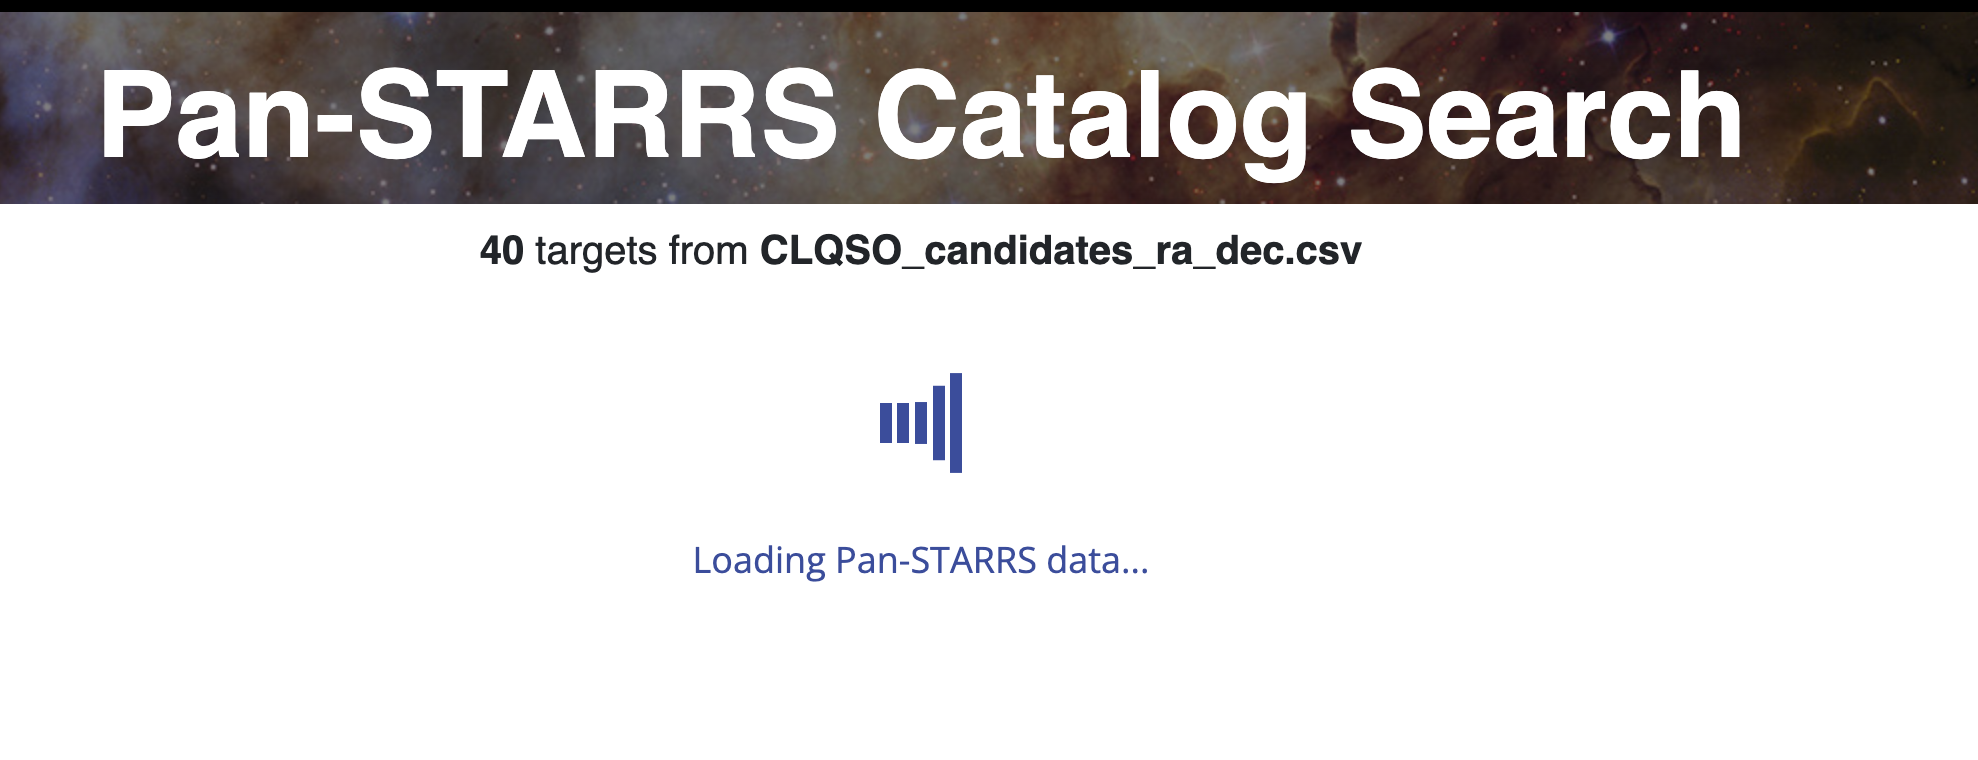


## Get the ZTF data 

The ZTF DR7 data https://www.ztf.caltech.edu/ztf-public-releases.html  can be downloaded using the `wget`-based function written by Paula Sanchez-Saez here https://github.com/LSST-sersag/dle/blob/main/activities/workshop/T2_Photometric_Reverberation_Mapping/Tutorial%202_PhotoRM_IJ.ipynb . I modify it to do just the downloading, because I prefer to read the files with astropy:

In [71]:
import pandas as pd
def get_ZTF_DR_lc(name, ra, dec, band, dr_path, keep_all_columns = False):
    
    """
    Author: Paula Sánchez Sáez, PhD
    
    Function to dowload an individual ZTF light curve using the ZTF API. 
    For more details about ZTF service, go to their documentation:
    https://irsa.ipac.caltech.edu/data/ZTF/docs/releases/dr08/ztf_release_notes_dr08.pdf 
    See section "iii. Querying Lightcurves using the API."
    
    Parameters:
    -----------
    name: str
        Object name (e.g. the object "SDSS J005132.94+180120.5" should be 
        refered here only by "J005132.94+180120.5")
    ra: float
        Right ascension of the object (in degrees).
    dec: float
        Declination of the object (in degrees).
    band: {'g', 'r', 'i'}
        ZTF photometric band.
    dr_path: str
        Path to the download directory.
    keep_all_columns: bool, default=False
        If False, only the most important light curve parameters will be retrieved. 
        Otherwise, keep all the columns.
        
    Returns:
    --------
    df: pd.DataFrame
        DataFrame containing the measurments of the retrieved light curve.
    """
    
    # make up a convenient filename
    fname = f'{name}_ZTF_{band}.csv'
    
    # don't download if the file already exists
    if os.path.exists(fname): 
        print(f'File {fname} already exists')
        
    else:
        file_path = os.path.join(dr_path, fname)
        irsa_path = "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves"
        url = f"{irsa_path}?POS=CIRCLE {ra} {dec} 0.000277778&BANDNAME={band}&FORMAT=csv"
        cmd = f'wget -O {file_path} '+ f'"{url}"' 
        print(cmd)
        os.system(cmd) 
   

To make it work notice that  ZTF expects object name to have "J0016...", so we add that:

In [55]:
clqso["SDSSJID2"] = ["J"+name for name in clqso["SDSSJID"]]

Download all available ZTF data for CLQSO candidates:

In [62]:
name = row['SDSSJID2']
band='r'
ra = row["ra"]
dec = row["dec"]
cmd ='wget -O '+dr_path+name+'_DR_'+band+'band.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE '+str(ra)+' '+str(dec)+' 0.000277778&BANDNAME='+band+'&FORMAT=csv"'
print(cmd)

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFJ235248.71-001518.4_DR_rband.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.203 -0.255 0.000277778&BANDNAME=r&FORMAT=csv"


In [ ]:
# make a directory if it doesn't exist yet
dr_path = os.path.join(os.getcwd(), 'ZTF')
if not os.path.exists(dr_path):
    os.mkdir(dr_path)

# download the ZTF data 
for row in clqso:
    for f in 'gri':
        get_ZTF_DR_lc(name=row['SDSSJID2'], 
                      ra=row["ra"], 
                      dec=row["dec"], 
                      band=f, 
                      dr_path=dr_path)
    


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.111 0.609 0.000277778&BANDNAME=g&FORMAT=csv"


--2022-08-31 16:29:39--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.111%200.609%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_g.csv'

     0K                                                        6.72M=0s

2022-08-31 16:29:41 (6.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_g.csv' saved [162]

--2022-08-31 16:29:41--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.111%200.609%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.111 0.609 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_r.csv'

     0K                                                        5.72M=0s

2022-08-31 16:29:45 (5.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_r.csv' saved [162]

--2022-08-31 16:29:45--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.111%200.609%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.111 0.609 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_i.csv'

     0K                                                        6.18M=0s

2022-08-31 16:29:48 (6.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001626.54+003632.4_ZTF_i.csv' saved [162]

--2022-08-31 16:29:48--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.382%200.819%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.382 0.819 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_g.csv'

     0K                                                        4.07M=0s

2022-08-31 16:29:51 (4.07 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_g.csv' saved [162]

--2022-08-31 16:29:51--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.382%200.819%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.382 0.819 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_r.csv'

     0K                                                        4.29M=0s

2022-08-31 16:29:54 (4.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_r.csv' saved [162]

--2022-08-31 16:29:54--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.382%200.819%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.382 0.819 0.000277778&BANDNAME=i&FORMAT=csv"


connected.
HTTP request sent, awaiting response... 200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_i.csv'

     0K                                                       100% 4.83M=0s

2022-08-31 16:29:57 (4.83 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J001731.70+004910.1_ZTF_i.csv' saved [162/162]

--2022-08-31 16:29:57--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%208.497%200.042%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 8.497 0.042 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_g.csv'

     0K                                                        2.97M=0s

2022-08-31 16:30:02 (2.97 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_g.csv' saved [162]

--2022-08-31 16:30:02--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%208.497%200.042%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 8.497 0.042 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_r.csv'

     0K                                                        1.96M=0s

2022-08-31 16:30:04 (1.96 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_r.csv' saved [162]

--2022-08-31 16:30:04--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%208.497%200.042%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 8.497 0.042 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_i.csv'

     0K                                                        3.22M=0s

2022-08-31 16:30:07 (3.22 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J003359.39+000230.0_ZTF_i.csv' saved [162]

--2022-08-31 16:30:07--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2012.926%200.358%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 12.926 0.358 0.000277778&BANDNAME=g&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_g.csv'

     0K .......... .......... .......... .......... ...         478K=0.09s

2022-08-31 16:30:13 (478 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_g.csv' saved [44436]

--2022-08-31 16:30:13--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2012.926%200.358%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 12.926 0.358 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  557K
    50K ........                                               13.0M=0.09s

2022-08-31 16:30:17 (651 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_r.csv' saved [60206]

--2022-08-31 16:30:17--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2012.926%200.358%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 12.926 0.358 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_i.csv'

     0K ...                                                    11.7M=0s

2022-08-31 16:30:20 (11.7 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005142.20+002129.0_ZTF_i.csv' saved [3182]

--2022-08-31 16:30:20--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2013.805%20-0.939%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 13.805 -0.939 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_g.csv'

     0K                                                        4.54M=0s

2022-08-31 16:30:23 (4.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_g.csv' saved [162]

--2022-08-31 16:30:23--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2013.805%20-0.939%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 13.805 -0.939 0.000277778&BANDNAME=r&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.



wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 13.805 -0.939 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_i.csv'

     0K                                                       100% 7.36M=0s

2022-08-31 16:30:34 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J005513.15-005621.2_ZTF_i.csv' saved [162/162]

--2022-08-31 16:30:34--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2017.05%20-0.088%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J010812.00-000516.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 17.05 -0.088 0.000277778&BANDNAME=g&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Ope

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J010812.00-000516.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 17.05 -0.088 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J010812.00-000516.5_ZTF_r.csv'

     0K .......... .......... .......... .......... .....       621K=0.07s

2022-08-31 16:30:42 (621 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J010812.00-000516.5_ZTF_r.csv' saved [46992]

--2022-08-31 16:30:42--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2017.05%20-0.088%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J010812.00-000516.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 17.05 -0.088 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... --2022-08-31 16:30:42--  (try: 5)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:30:42--  (try: 5)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:30:42--  (try: 5)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:30:42--  (try: 5)  http://8.497/
Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:30:42--  (try: 5)  http://36.271/
Connecting to 36.271|36.0.1.15|:80... --2022-08-31 16:30:42--  (try: 5)  http://4.111/
--2022-08-31 16:30:42--  (try: 5)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:30:42--  (try: 5)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:30:42--  (try: 5)  http://43.319/
--2022-08-31 16:30:42--  (try: 5)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... Connecting to 43.319|43.0.1.63|:80... --2022-08-31 16:30:42--  (try: 5)  http://35.666/
--2022-08-31 16:30:42--  (try: 5)  http:

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 20.309 -1.053 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  517K
    50K .....                                                  28.6M=0.1s

2022-08-31 16:30:48 (576 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_g.csv' saved [57169]

--2022-08-31 16:30:48--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2020.309%20-1.053%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 20.309 -1.053 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  563K
    50K .........                                              6.39M=0.09s

2022-08-31 16:30:51 (661 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_r.csv' saved [61142]

--2022-08-31 16:30:51--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2020.309%20-1.053%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 20.309 -1.053 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_i.csv'

     0K ........                                               34.2M=0s

2022-08-31 16:30:54 (34.2 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J012114.19-010310.8_ZTF_i.csv' saved [8720]

--2022-08-31 16:30:54--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2025.763%20-0.732%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 25.763 -0.732 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_g.csv'

     0K                                                        4.98M=0s

2022-08-31 16:30:57 (4.98 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_g.csv' saved [162]

--2022-08-31 16:30:57--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2025.763%20-0.732%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 25.763 -0.732 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_r.csv'

     0K                                                        3.09M=0s

2022-08-31 16:31:00 (3.09 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_r.csv' saved [162]

--2022-08-31 16:31:00--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2025.763%20-0.732%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 25.763 -0.732 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_i.csv'

     0K                                                        5.15M=0s

2022-08-31 16:31:03 (5.15 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J014303.23-004354.0_ZTF_i.csv' saved [162]

--2022-08-31 16:31:03--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.246%20-0.097%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.246 -0.097 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  679K
    50K .......... .......... .......... .......... .......... 7.02M
   100K .......... .......... .......... ....                  1.07M=0.1s

2022-08-31 16:31:07 (1.17 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_g.csv' saved [138082]

--2022-08-31 16:31:07--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.246%20-0.097%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.246 -0.097 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  651K
    50K .......... .......... ...                              8.04M=0.08s

2022-08-31 16:31:09 (919 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_r.csv' saved [74968]

--2022-08-31 16:31:09--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.246%20-0.097%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.246 -0.097 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_i.csv'

     0K .......... ...                                          257K=0.05s

2022-08-31 16:31:12 (257 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021259.00-000550.1_ZTF_i.csv' saved [13352]

--2022-08-31 16:31:12--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.871%20-0.887%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.871 -0.887 0.000277778&BANDNAME=g&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_g.csv'

     0K                                                        4.07M=0s

2022-08-31 16:31:18 (4.07 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_g.csv' saved [162]

--2022-08-31 16:31:18--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.871%20-0.887%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.871 -0.887 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_r.csv'

     0K                                                        4.54M=0s

2022-08-31 16:31:20 (4.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_r.csv' saved [162]

--2022-08-31 16:31:21--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.871%20-0.887%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.871 -0.887 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_i.csv'

     0K                                                       100% 7.72M=0s

2022-08-31 16:31:26 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J021529.02-005314.9_ZTF_i.csv' saved [162/162]

--2022-08-31 16:31:26--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2035.666%200.006%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 35.666 0.006 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_g.csv'

     0K                                                        5.94M=0s

2022-08-31 16:31:27 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_g.csv' saved [162]

--2022-08-31 16:31:27--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2035.666%200.006%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 35.666 0.006 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_r.csv'

     0K                                                        3.59M=0s

2022-08-31 16:31:30 (3.59 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_r.csv' saved [162]

--2022-08-31 16:31:30--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2035.666%200.006%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 35.666 0.006 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_i.csv'

     0K                                                        8.13M=0s

2022-08-31 16:31:33 (8.13 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022239.83+000022.5_ZTF_i.csv' saved [162]

--2022-08-31 16:31:33--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2036.271%200.293%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 36.271 0.293 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_g.csv'

     0K                                                       100% 6.44M=0s

2022-08-31 16:31:38 (6.44 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_g.csv' saved [162/162]

--2022-08-31 16:31:38--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2036.271%200.293%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 36.271 0.293 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_r.csv'

     0K                                                        3.68M=0s

2022-08-31 16:31:41 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_r.csv' saved [162]

--2022-08-31 16:31:41--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2036.271%200.293%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.



wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J022505.06+001733.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 36.271 0.293 0.000277778&BANDNAME=i&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

HTTP request sent, awaiting response... failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.



wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 39.824 -0.321 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_g.csv'

     0K                                                        3.29M=0s

2022-08-31 16:31:53 (3.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_g.csv' saved [162]

--2022-08-31 16:31:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2039.824%20-0.321%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 39.824 -0.321 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_r.csv'

     0K                                                        5.72M=0s

2022-08-31 16:31:54 (5.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_r.csv' saved [162]

--2022-08-31 16:31:54--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2039.824%20-0.321%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J023917.86-001916.8_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 39.824 -0.321 0.000277778&BANDNAME=i&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Ope

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 43.319 1.133 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_g.csv'

     0K                                                        7.36M=0s

2022-08-31 16:32:01 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_g.csv' saved [162]

--2022-08-31 16:32:01--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2043.319%201.133%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 43.319 1.133 0.000277778&BANDNAME=r&FORMAT=csv"


--2022-08-31 16:32:02--  (try: 6)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:32:02--  (try: 6)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:32:02--  (try: 6)  http://4.382/
--2022-08-31 16:32:02--  (try: 6)  http://8.497/
Connecting to 4.382|4.0.1.126|:80... Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:32:02--  (try: 6)  http://4.111/
--2022-08-31 16:32:02--  (try: 6)  http://4.111/
--2022-08-31 16:32:02--  (try: 6)  http://36.271/
Connecting to 4.111|4.0.0.111|:80... Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:32:02--  (try: 6)  http://4.111/
Connecting to 36.271|36.0.1.15|:80... Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:32:02--  (try: 6)  http://43.319/
Connecting to 43.319|43.0.1.63|:80... --2022-08-31 16:32:02--  (try: 6)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:32:02--  (try: 6)  http://35.666/
Connecting to 35.666|35.0.2.154|:80... --2022-08-31 16:32:02--  (try: 6)  http:/

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 43.319 1.133 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_i.csv'

     0K                                                        3.68M=0s

2022-08-31 16:32:06 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025316.46+010759.7_ZTF_i.csv' saved [162]

--2022-08-31 16:32:06--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2044.227%20-1.249%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 44.227 -1.249 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_g.csv'

     0K                                                        3.29M=0s

2022-08-31 16:32:09 (3.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_g.csv' saved [162]

--2022-08-31 16:32:09--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2044.227%20-1.249%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 44.227 -1.249 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_r.csv'

     0K                                                       100% 7.02M=0s

2022-08-31 16:32:12 (7.02 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_r.csv' saved [162/162]

--2022-08-31 16:32:12--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2044.227%20-1.249%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 44.227 -1.249 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_i.csv'

     0K                                                       100% 5.33M=0s

2022-08-31 16:32:14 (5.33 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J025654.42-011455.4_ZTF_i.csv' saved [162/162]

--2022-08-31 16:32:14--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2046.267%201.223%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 46.267 1.223 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_g.csv'

     0K                                                       100% 3.96M=0s

2022-08-31 16:32:19 (3.96 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_g.csv' saved [162/162]

--2022-08-31 16:32:19--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2046.267%201.223%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 46.267 1.223 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_r.csv'

     0K                                                        5.33M=0s

2022-08-31 16:32:22 (5.33 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_r.csv' saved [162]

--2022-08-31 16:32:22--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2046.267%201.223%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 46.267 1.223 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_i.csv'

     0K                                                        6.18M=0s

2022-08-31 16:32:25 (6.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J030504.07+011324.5_ZTF_i.csv' saved [162]

--2022-08-31 16:32:25--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2048.505%201.192%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 48.505 1.192 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_g.csv'

     0K                                                        5.94M=0s

2022-08-31 16:32:28 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_g.csv' saved [162]

--2022-08-31 16:32:28--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2048.505%201.192%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 48.505 1.192 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_r.csv'

     0K                                                        2.76M=0s

2022-08-31 16:32:31 (2.76 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_r.csv' saved [162]

--2022-08-31 16:32:31--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2048.505%201.192%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 48.505 1.192 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_i.csv'

     0K                                                        4.07M=0s

2022-08-31 16:32:33 (4.07 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031401.11+011131.6_ZTF_i.csv' saved [162]

--2022-08-31 16:32:33--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2049.692%20-0.94%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 49.692 -0.94 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_g.csv'

     0K                                                        4.18M=0s

2022-08-31 16:32:36 (4.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_g.csv' saved [162]

--2022-08-31 16:32:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2049.692%20-0.94%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 49.692 -0.94 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_r.csv'

     0K                                                        3.59M=0s

2022-08-31 16:32:39 (3.59 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_r.csv' saved [162]

--2022-08-31 16:32:39--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2049.692%20-0.94%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 49.692 -0.94 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_i.csv'

     0K                                                        3.77M=0s

2022-08-31 16:32:45 (3.77 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J031846.13-005622.8_ZTF_i.csv' saved [162]

--2022-08-31 16:32:45--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2051.941%200.871%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 51.941 0.871 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_g.csv'

     0K                                                        5.94M=0s

2022-08-31 16:32:48 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_g.csv' saved [162]

--2022-08-31 16:32:48--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2051.941%200.871%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 51.941 0.871 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_r.csv'

     0K                                                        3.96M=0s

2022-08-31 16:32:51 (3.96 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_r.csv' saved [162]

--2022-08-31 16:32:51--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2051.941%200.871%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 51.941 0.871 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_i.csv'

     0K                                                        8.13M=0s

2022-08-31 16:32:56 (8.13 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032745.74+005217.2_ZTF_i.csv' saved [162]

--2022-08-31 16:32:56--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.105%20-0.548%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032825.19-003252.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.105 -0.548 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032825.19-003252.3_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  535K
    50K .......... .......... .......                          75.1M=0.09s

2022-08-31 16:32:59 (821 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032825.19-003252.3_ZTF_g.csv' saved [78853]

--2022-08-31 16:32:59--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.105%20-0.548%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032825.19-003252.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.105 -0.548 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.



wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J032825.19-003252.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.105 -0.548 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... --2022-08-31 16:33:03--  (try: 5)  http://4.111/
--2022-08-31 16:33:03--  (try: 5)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:33:03--  (try: 5)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:33:03--  (try: 5)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:33:03--  (try: 5)  http://4.382/
--2022-08-31 16:33:03--  (try: 5)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:33:03--  (try: 5)  http://8.497/
Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:33:03--  (try: 5)  http://8.497/
Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:33:03--  (try: 5)  http://8.497/
Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:33:03--  (try: 5)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:33:03--  (try: 5)  http://12.926/
--2022-08-31 16:33:03--  (try: 5)  http://12.92

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.699 0.816 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_g.csv'

     0K                                                        3.86M=0s

2022-08-31 16:33:07 (3.86 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_g.csv' saved [162]

--2022-08-31 16:33:07--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.699%200.816%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.699 0.816 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_r.csv'

     0K                                                        4.07M=0s

2022-08-31 16:33:10 (4.07 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_r.csv' saved [162]

--2022-08-31 16:33:10--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.699%200.816%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.699 0.816 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_i.csv'

     0K                                                       100% 3.77M=0s

2022-08-31 16:33:13 (3.77 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033047.73+004859.4_ZTF_i.csv' saved [162/162]

--2022-08-31 16:33:13--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.746%201.164%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.746 1.164 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_g.csv'

     0K                                                        3.68M=0s

2022-08-31 16:33:16 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_g.csv' saved [162]

--2022-08-31 16:33:16--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.746%201.164%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.746 1.164 0.000277778&BANDNAME=r&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.



wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.746 1.164 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_i.csv'

     0K                                                        2.62M=0s

2022-08-31 16:33:22 (2.62 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033059.05+010952.0_ZTF_i.csv' saved [162]

--2022-08-31 16:33:22--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2053.63%20-0.151%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 53.63 -0.151 0.000277778&BANDNAME=g&FORMAT=csv"


--2022-08-31 16:33:23--  (try: 7)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:33:23--  (try: 7)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:33:23--  (try: 7)  http://8.497/
--2022-08-31 16:33:23--  (try: 7)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:33:23--  (try: 7)  http://4.111/
--2022-08-31 16:33:23--  (try: 7)  http://4.111/
--2022-08-31 16:33:23--  (try: 7)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:33:23--  (try: 7)  http://36.271/
Connecting to 4.111|4.0.0.111|:80... Connecting to 4.111|4.0.0.111|:80... Connecting to 36.271|36.0.1.15|:80... --2022-08-31 16:33:23--  (try: 7)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:33:23--  (try: 7)  http://43.319/
Connecting to 43.319|43.0.1.63|:80... --2022-08-31 16:33:23--  (try: 7)  http://35.666/
--2022-08-31 16:33:23--  (try: 7)  http://35.666/
Connecting to 35.666|35.0.2.15

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 53.63 -0.151 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_r.csv'

     0K .......... .......... .......... .......... .......     518K=0.09s

2022-08-31 16:33:28 (518 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_r.csv' saved [48757]

--2022-08-31 16:33:28--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2053.63%20-0.151%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 53.63 -0.151 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_i.csv'

     0K ..                                                     3.18M=0.001s

2022-08-31 16:33:31 (3.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J033431.17-000904.0_ZTF_i.csv' saved [2950]

--2022-08-31 16:33:31--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2056.303%200.379%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 56.303 0.379 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_g.csv'

     0K                                                        6.18M=0s

2022-08-31 16:33:34 (6.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_g.csv' saved [162]

--2022-08-31 16:33:34--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2056.303%200.379%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 56.303 0.379 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_r.csv'

     0K                                                        4.41M=0s

2022-08-31 16:33:37 (4.41 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_r.csv' saved [162]

--2022-08-31 16:33:37--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2056.303%200.379%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 56.303 0.379 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_i.csv'

     0K                                                        4.29M=0s

2022-08-31 16:33:40 (4.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J034512.62+002245.7_ZTF_i.csv' saved [162]

--2022-08-31 16:33:40--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20309.885%20-0.305%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 309.885 -0.305 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_g.csv'

     0K .......... .......... .......... ..........             714K=0.06s

2022-08-31 16:33:43 (714 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_g.csv' saved [41922]

--2022-08-31 16:33:43--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20309.885%20-0.305%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 309.885 -0.305 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_r.csv'

     0K .......... .......... .......... .......... ........    566K=0.09s

2022-08-31 16:33:46 (566 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_r.csv' saved [49546]

--2022-08-31 16:33:46--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20309.885%20-0.305%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 309.885 -0.305 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_i.csv'

     0K .......                                                11.3M=0.001s

2022-08-31 16:33:52 (11.3 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J203932.41-001818.3_ZTF_i.csv' saved [8163]

--2022-08-31 16:33:52--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.469%201.219%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.469 1.219 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_g.csv'

     0K                                                        4.18M=0s

2022-08-31 16:33:53 (4.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_g.csv' saved [162]

--2022-08-31 16:33:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.469%201.219%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.469 1.219 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_r.csv'

     0K                                                        7.72M=0s

2022-08-31 16:33:59 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_r.csv' saved [162]

--2022-08-31 16:33:59--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.469%201.219%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.469 1.219 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_i.csv'

     0K                                                        4.68M=0s

2022-08-31 16:34:00 (4.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J204952.62+011306.6_ZTF_i.csv' saved [162]

--2022-08-31 16:34:00--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.771%20-0.98%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.771 -0.98 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_g.csv'

     0K .......... .......... .......... ......                 767K=0.05s

2022-08-31 16:34:04 (767 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_g.csv' saved [37474]

--2022-08-31 16:34:04--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.771%20-0.98%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.771 -0.98 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_r.csv'

     0K .......... .......... .......... .......... .......     601K=0.08s

2022-08-31 16:34:07 (601 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_r.csv' saved [48189]

--2022-08-31 16:34:07--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.771%20-0.98%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.771 -0.98 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_i.csv'

     0K ........                                               17.5M=0s

2022-08-31 16:34:09 (17.5 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J205105.02-005847.5_ZTF_i.csv' saved [9177]

--2022-08-31 16:34:09--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.563%20-0.892%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.563 -0.892 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  609K
    50K ..                                                     49.6K=0.08s

2022-08-31 16:34:12 (639 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_g.csv' saved [53739]

--2022-08-31 16:34:12--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.563%20-0.892%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.563 -0.892 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  606K
    50K .......... ...                                         13.2M=0.08s

2022-08-31 16:34:15 (766 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_r.csv' saved [65526]

--2022-08-31 16:34:15--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.563%20-0.892%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.563 -0.892 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_i.csv'

     0K                                                        2.81M=0s

2022-08-31 16:34:17 (2.81 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215015.05-005331.4_ZTF_i.csv' saved [162]

--2022-08-31 16:34:17--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.731%20-0.294%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.731 -0.294 0.000277778&BANDNAME=g&FORMAT=csv"


failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.



wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.731 -0.294 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_r.csv'

     0K                                                        4.83M=0s

2022-08-31 16:34:20 (4.83 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_r.csv' saved [162]

--2022-08-31 16:34:20--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.731%20-0.294%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.731 -0.294 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_i.csv'

     0K                                                        2.45M=0s

2022-08-31 16:34:22 (2.45 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215055.51-001739.4_ZTF_i.csv' saved [162]

--2022-08-31 16:34:22--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20329.673%20-0.252%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215841.40-001507.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 329.673 -0.252 0.000277778&BANDNAME=g&FORMAT=csv"


--2022-08-31 16:34:23--  (try: 6)  http://4.111/
--2022-08-31 16:34:23--  (try: 6)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:34:23--  (try: 6)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:34:23--  (try: 6)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:34:23--  (try: 6)  http://4.382/
--2022-08-31 16:34:23--  (try: 6)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:34:23--  (try: 6)  http://8.497/
Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:34:23--  (try: 6)  http://8.497/
Connecting to 8.497|8.0.1.241|:80... --2022-08-31 16:34:23--  (try: 6)  http://8.497/
--2022-08-31 16:34:23--  (try: 6)  http://12.926/
Connecting to 8.497|8.0.1.241|:80... Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:34:23--  (try: 6)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:34:23--  (try: 6)  http://12.926

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215841.40-001507.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 329.673 -0.252 0.000277778&BANDNAME=r&FORMAT=csv"


--2022-08-31 16:34:24--  (try: 6)  http://51.941/
--2022-08-31 16:34:24--  (try: 6)  http://52.699/
Connecting to 51.941|51.0.3.173|:80... Connecting to 52.699|52.0.2.187|:80... --2022-08-31 16:34:24--  (try: 6)  http://52.699/
Connecting to 52.699|52.0.2.187|:80... HTTP request sent, awaiting response... --2022-08-31 16:34:24--  (try: 6)  http://52.699/
--2022-08-31 16:34:24--  (try: 6)  http://52.746/
Connecting to 52.699|52.0.2.187|:80... Connecting to 52.746|52.0.2.234|:80... --2022-08-31 16:34:24--  (try: 6)  http://52.746/
--2022-08-31 16:34:24--  (try: 6)  http://56.303/
--2022-08-31 16:34:24--  (try: 6)  http://56.303/
--2022-08-31 16:34:24--  (try: 6)  http://56.303/
Connecting to 56.303|56.0.1.47|:80... Connecting to 56.303|56.0.1.47|:80... Connecting to 56.303|56.0.1.47|:80... Connecting to 52.746|52.0.2.234|:80... --2022-08-31 16:34:24--  (try: 6)  http://52.746/
Connecting to 52.746|52.0.2.234|:80... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResear

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215841.40-001507.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 329.673 -0.252 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215841.40-001507.7_ZTF_i.csv'

     0K                                                        4.98M=0s

2022-08-31 16:34:28 (4.98 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J215841.40-001507.7_ZTF_i.csv' saved [162]

--2022-08-31 16:34:28--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20331.397%200.132%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 331.397 0.132 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_g.csv'

     0K                                                        3.51M=0s

2022-08-31 16:34:30 (3.51 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_g.csv' saved [162]

--2022-08-31 16:34:30--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20331.397%200.132%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 331.397 0.132 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_r.csv'

     0K                                                        3.43M=0s

2022-08-31 16:34:32 (3.43 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_r.csv' saved [162]

--2022-08-31 16:34:32--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20331.397%200.132%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 331.397 0.132 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_i.csv'

     0K                                                        6.18M=0s

2022-08-31 16:34:36 (6.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J220535.23+000756.3_ZTF_i.csv' saved [162]

--2022-08-31 16:34:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20333.447%200.325%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221347.32+001928.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 333.447 0.325 0.000277778&BANDNAME=g&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

Retrying.

200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221347.32+001928.4_ZTF_g.csv'

     0K                                                        4.41M=0s

2022-08-31 16:34:38 (4.41 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221347.32+001928.4_ZTF_g.csv' saved [162]

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

--2022-08-31 16:34:38--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20333.447%200.325%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.calte

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221347.32+001928.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 333.447 0.325 0.000277778&BANDNAME=r&FORMAT=csv"


failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221347.32+001928.4_ZTF_r.csv'

     0K                                                        4.68M=0s

2022-08-31 16:34:41 (4.68 MB/s) - '/Users/chris/GradResearch/2022_CLQ

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221347.32+001928.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 333.447 0.325 0.000277778&BANDNAME=i&FORMAT=csv"


--2022-08-31 16:34:45--  (try: 8)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:34:45--  (try: 8)  http://4.382/
Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:34:45--  (try: 8)  http://8.497/
--2022-08-31 16:34:45--  (try: 8)  http://4.382/
Connecting to 8.497|8.0.1.241|:80... Connecting to 4.382|4.0.1.126|:80... --2022-08-31 16:34:45--  (try: 8)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:34:45--  (try: 8)  http://4.111/
--2022-08-31 16:34:45--  (try: 8)  http://4.111/
Connecting to 4.111|4.0.0.111|:80... Connecting to 4.111|4.0.0.111|:80... --2022-08-31 16:34:45--  (try: 8)  http://36.271/
Connecting to 36.271|36.0.1.15|:80... --2022-08-31 16:34:45--  (try: 8)  http://43.319/
Connecting to 43.319|43.0.1.63|:80... --2022-08-31 16:34:45--  (try: 8)  http://12.926/
Connecting to 12.926|12.0.3.158|:80... --2022-08-31 16:34:45--  (try: 8)  http://35.666/
Connecting to 35.666|35.0.2.154|:80... --2022-08-31 16:34:45--  (try: 8)  http:/

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 334.632 -0.764 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_g.csv'

     0K                                                        3.86M=0s

2022-08-31 16:34:48 (3.86 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_g.csv' saved [162]

--2022-08-31 16:34:48--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20334.632%20-0.764%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 334.632 -0.764 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_r.csv'

     0K                                                        3.86M=0s

2022-08-31 16:34:54 (3.86 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_r.csv' saved [162]

--2022-08-31 16:34:54--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20334.632%20-0.764%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 334.632 -0.764 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_i.csv'

     0K                                                        7.36M=0s

2022-08-31 16:34:55 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J221831.58-004548.9_ZTF_i.csv' saved [162]

--2022-08-31 16:34:55--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20337.326%20-0.668%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 337.326 -0.668 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_g.csv'

     0K                                                        3.68M=0s

2022-08-31 16:35:01 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_g.csv' saved [162]

--2022-08-31 16:35:01--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20337.326%20-0.668%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 337.326 -0.668 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_r.csv'

     0K                                                        3.43M=0s

2022-08-31 16:35:02 (3.43 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_r.csv' saved [162]

--2022-08-31 16:35:02--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20337.326%20-0.668%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 337.326 -0.668 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_i.csv'

     0K                                                        3.68M=0s

2022-08-31 16:35:05 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J222918.25-004003.6_ZTF_i.csv' saved [162]

--2022-08-31 16:35:05--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20343.168%201.166%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 343.168 1.166 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_g.csv'

     0K                                                       100% 6.18M=0s

2022-08-31 16:35:07 (6.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_g.csv' saved [162/162]

--2022-08-31 16:35:08--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20343.168%201.166%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 343.168 1.166 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_r.csv'

     0K                                                        3.68M=0s

2022-08-31 16:35:10 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_r.csv' saved [162]

--2022-08-31 16:35:10--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20343.168%201.166%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 343.168 1.166 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_i.csv'

     0K                                                        3.68M=0s

2022-08-31 16:35:16 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J225240.37+010958.7_ZTF_i.csv' saved [162]

--2022-08-31 16:35:16--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20347.634%20-1.247%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 347.634 -1.247 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_g.csv'

     0K ........                                               7.04M=0.001s

2022-08-31 16:35:17 (7.04 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_g.csv' saved [8655]

--2022-08-31 16:35:17--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20347.634%20-1.247%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 347.634 -1.247 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_r.csv'

     0K .........                                               244K=0.04s

2022-08-31 16:35:20 (244 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_r.csv' saved [9909]

--2022-08-31 16:35:20--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20347.634%20-1.247%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 347.634 -1.247 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_i.csv'

     0K                                                        3.77M=0s

2022-08-31 16:35:23 (3.77 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231032.17-011449.5_ZTF_i.csv' saved [162]

--2022-08-31 16:35:23--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20349.971%20-1.028%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 349.971 -1.028 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_g.csv'

     0K                                                       100% 4.29M=0s

2022-08-31 16:35:28 (4.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_g.csv' saved [162/162]

--2022-08-31 16:35:28--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20349.971%20-1.028%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 349.971 -1.028 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_r.csv'

     0K                                                        3.96M=0s

2022-08-31 16:35:30 (3.96 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_r.csv' saved [162]

--2022-08-31 16:35:30--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20349.971%20-1.028%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 349.971 -1.028 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_i.csv'

     0K                                                       100% 4.07M=0s

2022-08-31 16:35:33 (4.07 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J231953.07-010139.0_ZTF_i.csv' saved [162/162]

--2022-08-31 16:35:33--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20350.129%20-0.678%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J232030.97-004039.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 350.129 -0.678 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J232030.97-004039.2_ZTF_g.csv'

     0K                                                        5.72M=0s

2022-08-31 16:35:36 (5.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J232030.97-004039.2_ZTF_g.csv' saved [162]

--2022-08-31 16:35:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20350.129%20-0.678%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J232030.97-004039.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 350.129 -0.678 0.000277778&BANDNAME=r&FORMAT=csv"


failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
failed: Operation timed out.
Retrying.

Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

failed: Operation timed out.
Retrying.

200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTF/J232030.97-004039.2_ZTF_r.csv'

     0K                                                        3.96M=0s

2022-08-31 16:35:39 (3.96 MB/

Not all of these objects have ZTF data... This can be checked with `wc -l *` :

In [ ]:
! wc -l ZTF/*

**Next:**

   * plot SDSS-r, PS1-r, ZTF-r without photometric offsets
   * apply offsets to ZTF data (PS1 not needed)
    